In [1]:
import numpy as np

data = np.genfromtxt("ArrowrockReservoirElevation.csv",delimiter=',')

In [2]:
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting

# We will use Pandas - a powerful library built precisey for analyses 
# like this - to read the data in the CSV file into a 'dataframe' the 
# fundamental unit of working with Pandas. In this instance I use the 'read_csv'
# function to create a dataframe, defining column names for myself and telling 
# pandas to skip the header row. I could  have left the 'names' and 'skiprows'
# options and Pandas would have defined the names based on the header row.
df = pd.read_csv('ArrowrockReservoirElevation.csv', names=['Elevation','Y','M','D'], skiprows=1)

# Now, here's what the first 20 records of dataframe looks like
df[0:20]

,Elevation,Y,M,D
0,3130.27,2006,10,1
1,3131.10,2006,10,2
2,3131.94,2006,10,3
3,3132.78,2006,10,4
4,3133.68,2006,10,5
5,3134.54,2006,10,6
6,3135.41,2006,10,7
7,3136.32,2006,10,8
8,3137.17,2006,10,9
9,3138.02,2006,10,10


In [3]:
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')


# Here's what the first 20 records of the modified dataframe looks like
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Elevation,Y,M,D,SerDates
0,3130.27,2006,10,1,2006-10-01
1,3131.10,2006,10,2,2006-10-02
2,3131.94,2006,10,3,2006-10-03
3,3132.78,2006,10,4,2006-10-04
4,3133.68,2006,10,5,2006-10-05
5,3134.54,2006,10,6,2006-10-06
6,3135.41,2006,10,7,2006-10-07
7,3136.32,2006,10,8,2006-10-08
8,3137.17,2006,10,9,2006-10-09
9,3138.02,2006,10,10,2006-10-10


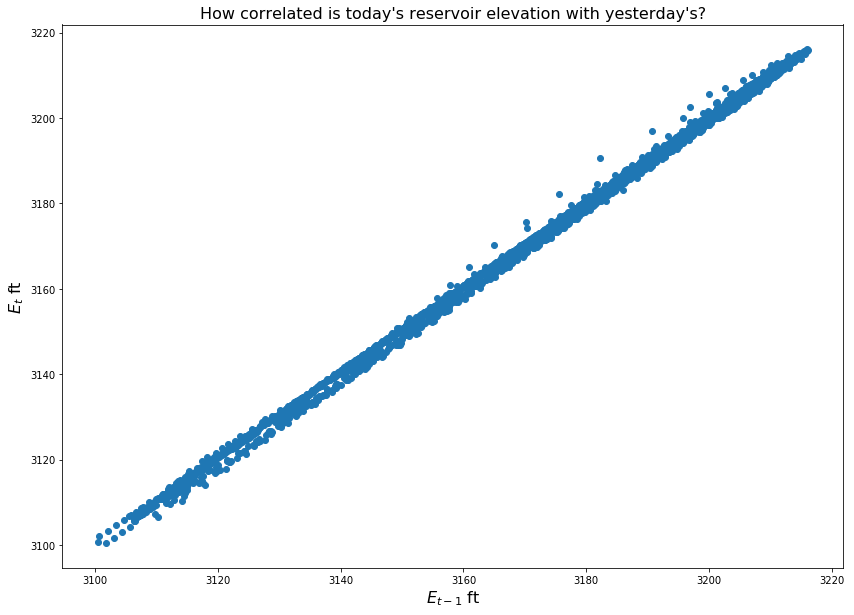

In [4]:
E = df['Elevation'].values 

# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Et   = E[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Etm1 = E[0:-2]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Etm1,Et,'o')
plt.title('How correlated is today\'s reservoir elevation with yesterday\'s?',fontsize=16)
plt.xlabel('$E_{t-1}$ ft',fontsize=16)
plt.ylabel('$E_t$ ft',fontsize=16)
plt.show()

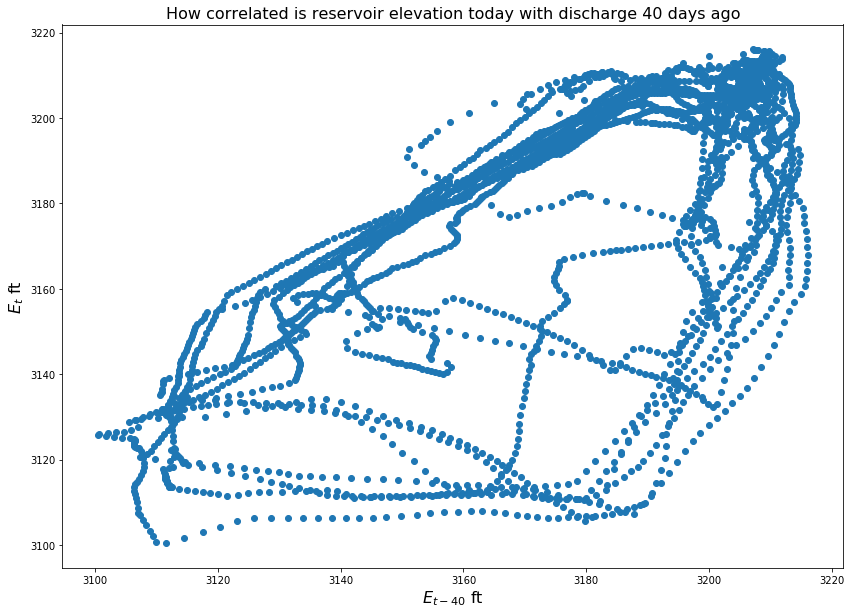

In [5]:

Et   = E[40:-1] 
Etmk = E[0:-(41)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Etmk,Et,'o')
plt.title('How correlated is reservoir elevation today with discharge 40 days ago',fontsize=16)
plt.xlabel('$E_{t-40}$ ft',fontsize=16)
plt.ylabel('$E_t$ ft',fontsize=16)
plt.show()

In [6]:
R = np.corrcoef(Etmk,Et)
R[1,0]

0.65340013934250896

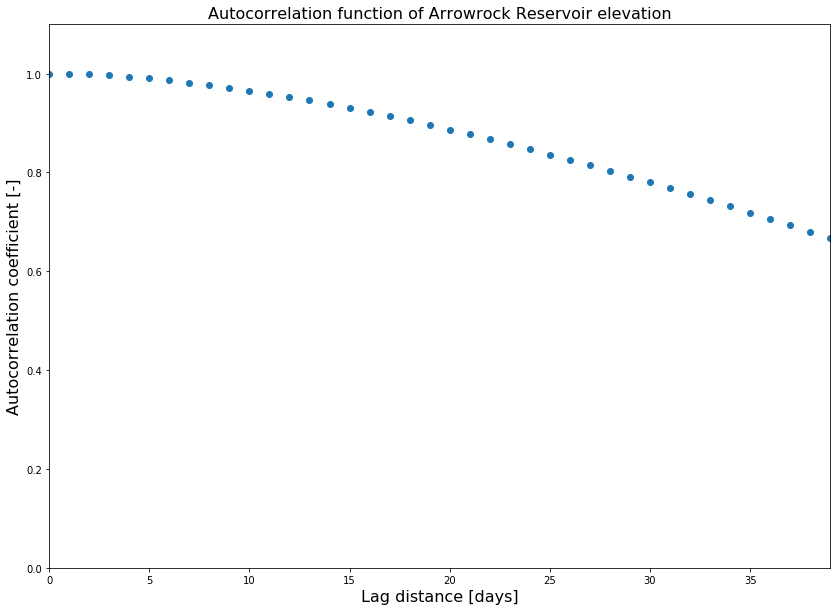

In [7]:
Nk = 40
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    Et   = E[k:-1] 
    Etmk = E[0:-(1+k)]
    R = np.corrcoef(Etmk,Et)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Arrowrock Reservoir elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Elevation'])

ModuleNotFoundError: No module named 'pandas.plotting'

In [ ]:
Ep = E - np.mean(E)

autocovs2 = np.correlate(Ep, Ep, mode='full')

N = autocovs2.size

autocovs2_oneside = autocovs2[N//2:]

autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10))
plt.plot(K,autocorrs2_oneside[0:Nk],'o')
plt.ylim(0.0,1.1)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.title('Autocorrelation function of Arrowrock Reservoir elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)

In [ ]:
Nk2 = 365*7
K2 = np.arange(0,Nk2,1)

plt.figure(figsize=(14,10))
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of Arrowrock Reservoir elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)